# importing libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
raw_df = pd.read_csv(r"C:\Users\adithyan s\Downloads\Amazon_Unlocked_Mobile.csv")
pdf=raw_df.copy()

In [4]:
pdf

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


#EDA

In [5]:
pdf.shape

(413840, 6)

In [6]:
pdf.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [7]:
pdf.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [8]:
pdf.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [10]:
counts=pdf['Rating'].value_counts()
counts

Rating
5    223605
1     72350
4     61392
3     31765
2     24728
Name: count, dtype: int64

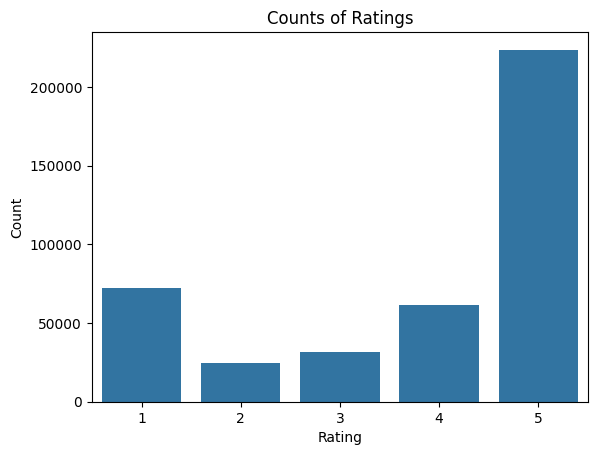

In [11]:
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Ratings')
plt.show()

In [12]:
counts1=pdf['Brand Name'].value_counts()
counts1

Brand Name
Samsung         65747
BLU             63248
Apple           58186
LG              22417
BlackBerry      16872
                ...  
S7 active           1
ThL                 1
Android             1
Danger Inc.         1
ToShare Tech        1
Name: count, Length: 384, dtype: int64

In [13]:
## DATA CLEANING


In [14]:
#CHECKING MISSING VALUES

In [15]:
pdf.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

In [16]:
pdf.isnull().sum()/len(pdf)*100

Product Name     0.000000
Brand Name      15.747874
Price            1.433646
Rating           0.000000
Reviews          0.016915
Review Votes     2.971197
dtype: float64

#Handling missing values

In [17]:
pdf=pdf.dropna(subset=['Brand Name'])
pdf = pdf.dropna(subset=['Reviews'])

In [18]:
pdf['Price'].unique()

array([199.99, 299.  ,  69.99, ...,  32.49,  32.98,  21.8 ], shape=(1551,))

In [19]:
pdf["Price"] = pdf["Price"].fillna(pdf["Price"].median())

pdf["Review Votes"] = pdf['Review Votes'].fillna(pdf['Review Votes'].median())

In [20]:
pdf.isna().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

#REMOVING UNNESSARY COLUMNS

In [21]:
pdf1=pdf[['Rating','Reviews']]
pdf1

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
...,...,...
413835,5,another great deal great price
413836,3,Ok
413837,5,Passes every drop test onto porcelain tile!
413838,3,I returned it because it did not meet my needs...


#finding and removing duplicates

In [22]:
pdf1['Reviews'].duplicated().sum()

np.int64(205495)

In [23]:
pdf1 = pdf1.drop_duplicates(subset=['Reviews'], keep='first')
pdf1

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
...,...,...
413824,4,works great and picks up signal in place my ot...
413825,5,"Great phone. Large keys, best flip phone I hav..."
413826,5,"Pros...Works great, very durable, easy to navi..."
413827,5,just as described perfect for the price


In [24]:
pdf1.duplicated().sum()

np.int64(0)


#preprocessed data

In [25]:
pdf1 = pdf1[["Reviews", "Rating"]]
pdf1

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
...,...,...
413824,works great and picks up signal in place my ot...,4
413825,"Great phone. Large keys, best flip phone I hav...",5
413826,"Pros...Works great, very durable, easy to navi...",5
413827,just as described perfect for the price,5


In [26]:
pdf1.shape

(143121, 2)

In [27]:
pdf1.describe()

,Rating
count,143121.000000
mean,3.643134
std,1.594648
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [28]:
clean = pdf.shape[0] - pdf1.shape[0]
print(f"THESE AMOUNT OF DATA'S CLEANED :{clean}")

THESE AMOUNT OF DATA'S CLEANED :205495


# VISUALIZE THE PREPROCESSED DATA

In [29]:
count1=pdf1['Rating'].value_counts()
count1

Rating
5    68687
1    28900
4    22631
3    12744
2    10159
Name: count, dtype: int64

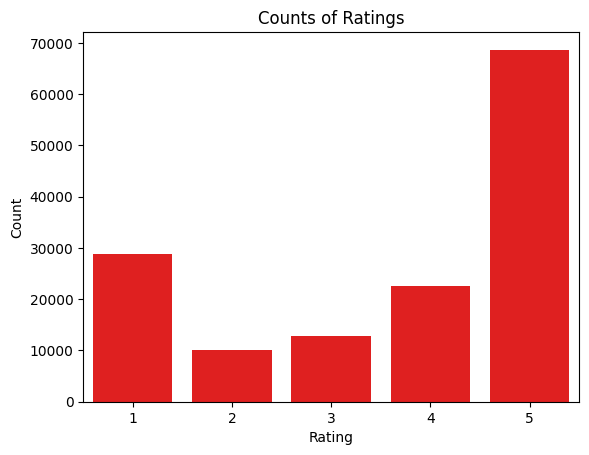

In [30]:
sns.barplot(x=count1.index, y=count1.values,color='red')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Ratings')
plt.show()

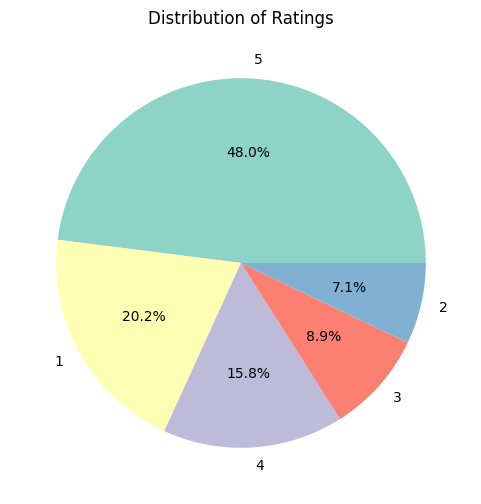

In [31]:
plt.figure(figsize=(6,6))
plt.pie(count1.values, labels=count1.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Ratings')
plt.show()

# BALANCED DATA SET

#resample

In [32]:
target_count = 10000

# Step 3: Create balanced dataset
balanced_df = pd.concat([
    pdf1[pdf1['Rating'] == rating].sample(
        n=target_count, 
        replace=False,  # ensures no duplicates
        random_state=42
    )
    for rating in pdf1['Rating'].unique()
])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Check counts
print(balanced_df['Rating'].value_counts())

Rating
2    10000
5    10000
4    10000
3    10000
1    10000
Name: count, dtype: int64


In [33]:
balanced_df['Rating'].value_counts()

Rating
2    10000
5    10000
4    10000
3    10000
1    10000
Name: count, dtype: int64

In [34]:
balanced_df

,Reviews,Rating
0,"In general the phone is okay, the only issue i...",2
1,Product was without a blemish or scratch. It i...,5
2,Great in every aspect. Perfect ratio Specs/Price,5
3,I bought the wrong thing but ti was really cut...,4
4,"Sound is horrible on calls, can barely hear pe...",2
...,...,...
49995,"Good price for an entry level iPhone. Fast, re...",4
49996,Good phone for the price. Very basic. Though i...,3
49997,Not as advertised. First off it came as a bran...,2
49998,"Excelent for the prive, good value",5


In [35]:
balanced_df.shape

(50000, 2)

In [36]:
balanced_df['Reviews'].duplicated().sum()

np.int64(0)

In [37]:
data=balanced_df['Rating'].value_counts()

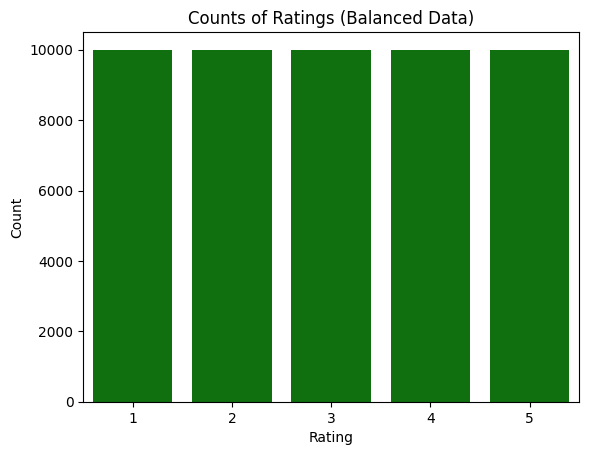

In [38]:
sns.barplot(x=data.index, y=data.values, color='green')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Ratings (Balanced Data)')
plt.show()

In [39]:
balanced_df['Reviews'].head(5)

0    In general the phone is okay, the only issue i...
1    Product was without a blemish or scratch. It i...
2     Great in every aspect. Perfect ratio Specs/Price
3    I bought the wrong thing but ti was really cut...
4    Sound is horrible on calls, can barely hear pe...
Name: Reviews, dtype: object

In [40]:
balanced_df.shape

(50000, 2)

#  IMBALANCED_DATA SETS

In [41]:
imbalanced_df = pdf1[~pdf1.index.isin(balanced_df.index)]
imbalanced_df

,Reviews,Rating
50176,Working perfect,5
50177,My battery does not last longer than 3 hours a...,1
50178,Phone is not unlocked. Apparently only works i...,1
50179,I'm guessing this is one of the Japanese ones ...,1
50180,"bought for a friend, she loves it.",5
...,...,...
413824,works great and picks up signal in place my ot...,4
413825,"Great phone. Large keys, best flip phone I hav...",5
413826,"Pros...Works great, very durable, easy to navi...",5
413827,just as described perfect for the price,5


In [42]:
print("Original dataset size:", len(pdf1))
print("Balanced dataset size:", len(balanced_df))
print("Imbalanced dataset size:", len(imbalanced_df))

Original dataset size: 143121
Balanced dataset size: 50000
Imbalanced dataset size: 129724


In [43]:
imbalanced_df.shape

(129724, 2)

In [44]:
count1=imbalanced_df['Rating'].value_counts()
count1

Rating
5    61961
1    25846
4    20917
3    11729
2     9271
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

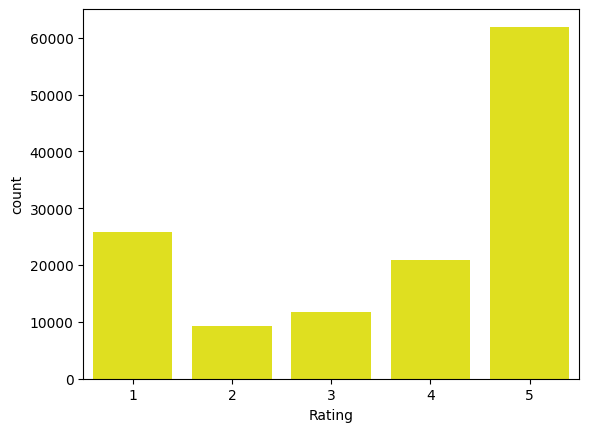

In [45]:
sns.barplot(data=count1,color="yellow")

In [46]:
min_percentage=0.10
max_percentage=0.30

In [47]:
total_rows = 50000

In [48]:
target_percent = {
    1: 0.15,  # 15
    2: 0.10,  # 10%
    3: 0.25,  # 25%
    4: 0.20,  # 20%
    5: 0.30   # 30%
}

In [49]:
# Convert to counts
target_counts = {k: int(v * total_rows) for k, v in target_percent.items()}
target_counts

{1: 7500, 2: 5000, 3: 12500, 4: 10000, 5: 15000}

In [50]:
# Sample rows from imbalanced_df for each rating
imbalanced_sample = pd.concat([
    imbalanced_df[imbalanced_df['Rating'] == rating].sample(n=count, random_state=42, replace=True)
    for rating, count in target_counts.items()
])

In [51]:
imbalanced_sample = imbalanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check distribution
print("Imbalanced dataset size:", len(imbalanced_sample))
print(imbalanced_sample['Rating'].value_counts(normalize=True) * 100)

Imbalanced dataset size: 50000
Rating
5    30.0
3    25.0
4    20.0
1    15.0
2    10.0
Name: proportion, dtype: float64


In [52]:
imbalanced_sample

,Reviews,Rating
0,I like the phone very much for the price. only...,4
1,"it is a cheap phone, with limited functionalit...",2
2,bought as a gift ... worked about 2 months.,1
3,I had the phone for a couple weeks and it stop...,2
4,"Excellent the equipment arrived very well, and...",5
...,...,...
49995,"Being a Blackberry user for 5 years, I did wan...",2
49996,Activation is easy. It comes w/ direction. Jus...,5
49997,Great phone for a moderate price,5
49998,The phone could not work at all. I was unable ...,1


C:\Users\adithyan s\AppData\Local\Temp\ipykernel_22476\4279757979.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=imbalanced_sample, palette="viridis")


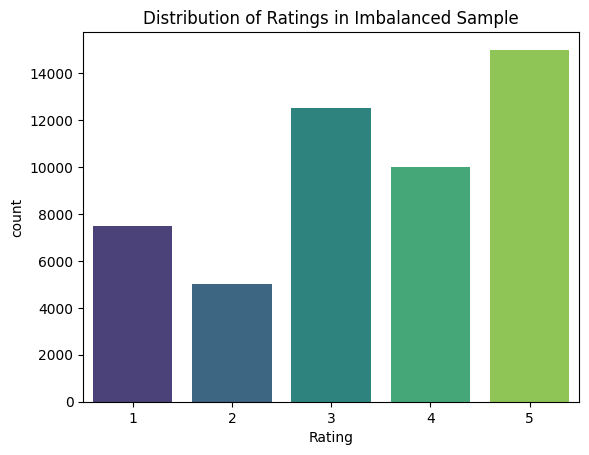

In [53]:
sns.countplot(x="Rating", data=imbalanced_sample, palette="viridis")
plt.title("Distribution of Ratings in Imbalanced Sample")
plt.show()

# NLP APPLYING FOR BALANCED DATA SET

#importing libaries

In [54]:


import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [55]:
# Download resources if not already done
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\adithyan
[nltk_data]     s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\adithyan
[nltk_data]     s\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\adithyan
[nltk_data]     s\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [56]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# ---- TEXT CLEANING FUNCTION ----

In [57]:
def clean_text_with_stopwords_info(text):
    removed_stopwords = []

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 4. Remove punctuation, special characters, and numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)

    # 5. Tokenize
    words = text.split()

    # 6. Remove stopwords
    cleaned_words = []
    for w in words:
        if w in stop_words:
            removed_stopwords.append(w)
        else:
            cleaned_words.append(w)

    # 7. Lemmatization
    cleaned_words = [lemmatizer.lemmatize(w) for w in cleaned_words]

    # 8. Join cleaned words
    cleaned_text = " ".join(cleaned_words).strip()

    # Info about removed stopwords
    num_removed = len(removed_stopwords)
    unique_removed = list(set(removed_stopwords))

    return cleaned_text, num_removed, unique_removed


In [58]:
text = "This is an example sentence with some stopwords."
cleaned_text, num_removed, removed_words = clean_text_with_stopwords_info(text)

print("Cleaned Text:", cleaned_text)
print("Number of stopwords removed:", num_removed)
print("Removed stopwords:", removed_words)

Cleaned Text: example sentence stopwords
Number of stopwords removed: 5
Removed stopwords: ['an', 'some', 'is', 'this', 'with']



# ---- FILTER TEXTS BETWEEN 3 AND 100 WORDS ----

In [59]:

# Use the cleaning function and extract only the cleaned text
balanced_df['clean_text'] = balanced_df['Reviews'].apply(lambda x: clean_text_with_stopwords_info(x)[0])

# ---- FILTER TEXTS BETWEEN 3 AND 100 WORDS ----
balanced_df['word_count'] = balanced_df['clean_text'].apply(lambda x: len(x.split()))

filtered_df = balanced_df[(balanced_df['word_count'] >= 3) & (balanced_df['word_count'] <= 100)]
filtered_df


,Reviews,Rating,clean_text,word_count
0,"In general the phone is okay, the only issue i...",2,general phone okay issue keep charge wish coul...,16
1,Product was without a blemish or scratch. It i...,5,product without blemish scratch apple watch li...,8
2,Great in every aspect. Perfect ratio Specs/Price,5,great every aspect perfect ratio specsprice,6
3,I bought the wrong thing but ti was really cut...,4,bought wrong thing ti really cute packaged wel...,11
4,"Sound is horrible on calls, can barely hear pe...",2,sound horrible call barely hear person end blu...,16
...,...,...,...,...
49995,"Good price for an entry level iPhone. Fast, re...",4,good price entry level iphone fast reliable wo...,15
49996,Good phone for the price. Very basic. Though i...,3,good phone price basic though quit working week,8
49997,Not as advertised. First off it came as a bran...,2,advertised first came branded phone att image ...,90
49998,"Excelent for the prive, good value",5,excelent prive good value,4


C:\Users\adithyan s\AppData\Local\Temp\ipykernel_22476\3332917702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=filtered_df, palette='viridis')


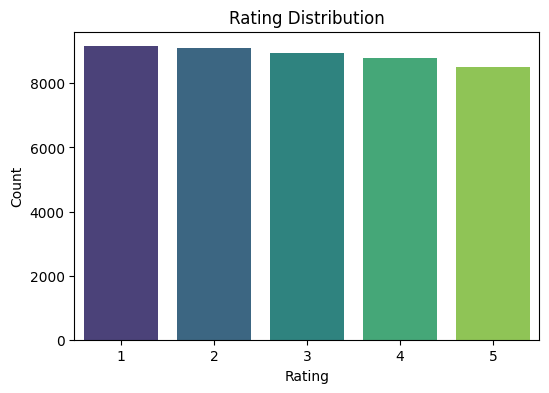

In [60]:
# Bar plot of ratings
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=filtered_df, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#every ratings 5 reviews  sample

In [61]:
filtered_df. columns

Index(['Reviews', 'Rating', 'clean_text', 'word_count'], dtype='object')

In [62]:
# Show 5 random samples per rating
for rating in sorted(filtered_df['Rating'].unique()):
    print(f"\n===== Rating: {rating} =====")
    samples = filtered_df[filtered_df['Rating'] == rating].sample(n=5, random_state=42)
    for i, review in enumerate(samples['clean_text'], 1):
        print(f"{i}. {review}\n")


===== Rating: 1 =====
1. make phone g lte like description say stop gps signal lost connected att caused lot stress make work like description say ill keep phone thatll much convenient returning

2. phone came clean scratch look like came first time power would hold chargethen horrible part speaker sounded horrible couldnt even hear ring tone loudes phone refurbished look great reason return cause speaker sounded like st

3. screen blew within month couldnt replace figure

4. phone remaked order new lumia get lifetime counter jesus charger nokia fitting inferior charger brand product name oem product date data cable producted nokia need compensation order

5. ordered phone actually nfc capability


===== Rating: 2 =====
1. think item advertise new really new refurbished purchased two phone one worked three week would rec ognize sim card send back one one working either week ill send back alsoim state costly send back phone worse part im extremely disappointed love phone wish would wor

In [63]:
filtered_df['clean_text'].head(5)

0    general phone okay issue keep charge wish coul...
1    product without blemish scratch apple watch li...
2          great every aspect perfect ratio specsprice
3    bought wrong thing ti really cute packaged wel...
4    sound horrible call barely hear person end blu...
Name: clean_text, dtype: object

#TRAIN-TEST SPLIT (80–20)

In [64]:
from sklearn.model_selection import train_test_split

# X = cleaned text, y = target (ratings)
X1 = filtered_df['clean_text']
y1 = filtered_df['Rating']

In [65]:
# Split 80-20
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

In [66]:
print("Train size:", X_train1.shape[0])
print("Test size:", X_test1.shape[0])

Train size: 35597
Test size: 8900


# TF–IDF VECTORIZATION

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on training data and transform both
X_train_tfidf = tfidf.fit_transform(X_train1)
X_test_tfidf = tfidf.transform(X_test1)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)

TF-IDF train shape: (35597, 5000)
TF-IDF test shape: (8900, 5000)


## normalization of imbalanced dataset

In [68]:
imbalanced_sample

,Reviews,Rating
0,I like the phone very much for the price. only...,4
1,"it is a cheap phone, with limited functionalit...",2
2,bought as a gift ... worked about 2 months.,1
3,I had the phone for a couple weeks and it stop...,2
4,"Excellent the equipment arrived very well, and...",5
...,...,...
49995,"Being a Blackberry user for 5 years, I did wan...",2
49996,Activation is easy. It comes w/ direction. Jus...,5
49997,Great phone for a moderate price,5
49998,The phone could not work at all. I was unable ...,1


In [69]:
# creating objects for stopwords removes and lemmatization process
stop_words1 = set(stopwords.words('english'))
lemmatizer1 = WordNetLemmatizer()

# ---- TEXT CLEANING FUNCTION ----

In [70]:




def clean_text(text):
  
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 4. Remove punctuation, special characters, and numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)

    # 5. Tokenize
    words = text.split()

    # 6. Remove stopwords
    words = [w for w in words if w not in stop_words1]

    # 7. Lemmatization
    words = [lemmatizer1.lemmatize(w) for w in words]

    # 8. Join cleaned words and remove extra spaces
    cleaned_text = " ".join(words)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text



# ---- FILTER TEXTS BETWEEN 3 AND 100 WORDS ----

In [71]:


# ---- CREATE CLEANED TEXT COLUMN ----
imbalanced_sample['imbalanced_cleaned_text'] = imbalanced_sample['Reviews'].apply(clean_text)
# ---- FILTER TEXTS BETWEEN 3 AND 100 WORDS ----
imbalanced_sample['word_count'] = imbalanced_sample['imbalanced_cleaned_text'].apply(
	lambda x: len(x.split()) if isinstance(x, str) else 0
)

filtered_df1 = imbalanced_sample[(imbalanced_sample['word_count'] >= 3) & (imbalanced_sample['word_count'] <= 100)]
filtered_df1


,Reviews,Rating,imbalanced_cleaned_text,word_count
0,I like the phone very much for the price. only...,4,like phone much price battery life great wonde...,12
1,"it is a cheap phone, with limited functionalit...",2,cheap phone limited functionality probably goo...,11
2,bought as a gift ... worked about 2 months.,1,bought gift worked month,4
3,I had the phone for a couple weeks and it stop...,2,phone couple week stopped booting liked phone ...,19
4,"Excellent the equipment arrived very well, and...",5,excellent equipment arrived well recommend sel...,8
...,...,...,...,...
49995,"Being a Blackberry user for 5 years, I did wan...",2,blackberry user year want like new classic bla...,85
49996,Activation is easy. It comes w/ direction. Jus...,5,activation easy come w direction follow direct...,18
49997,Great phone for a moderate price,5,great phone moderate price,4
49998,The phone could not work at all. I was unable ...,1,phone could work unable access o even tried ja...,18


#   5 random samples per rating

In [72]:

for rating in sorted(filtered_df1['Rating'].unique()):
    print(f"\n===== Rating: {rating} =====")
    samples = filtered_df1[filtered_df1['Rating'] == rating].sample(n=5, random_state=42)
    for i, review in enumerate(samples['imbalanced_cleaned_text'], 1):
        print(f"{i}. {review}\n")


===== Rating: 1 =====
1. buy breedi bought phone supplier breed everything wrong day one phone delivered damaged packaging inside plastic bag phone weird smelly black dust like substance scratch phone didnt charge properlyi bought phone august th today october nd phone screen turned white cut screen doesnt worki believe problem phone brand model think sold already defective phone breedbreeds customer service absolute worst ever seen amazon yearswhile phone worked amazing im going buy exact model different supplier

2. absolute call quality touch screen everything phone suck

3. got defected phone hear speaker hum malfunctioning screen sensor disappointed

4. month volume button stooped workingafter month phone began glitchif buy unlocked phone way get support say warranty year nobody fix usausa samsung representative left malaysian support tried call working

5. would hold charge battery drained completely would power able use phone week


===== Rating: 2 =====
1. returned phone coupl

#AVERAGE WORD COUNT PER RATING

C:\Users\adithyan s\AppData\Local\Temp\ipykernel_22476\3034757827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='word_count', data=avg_words, palette='magma')


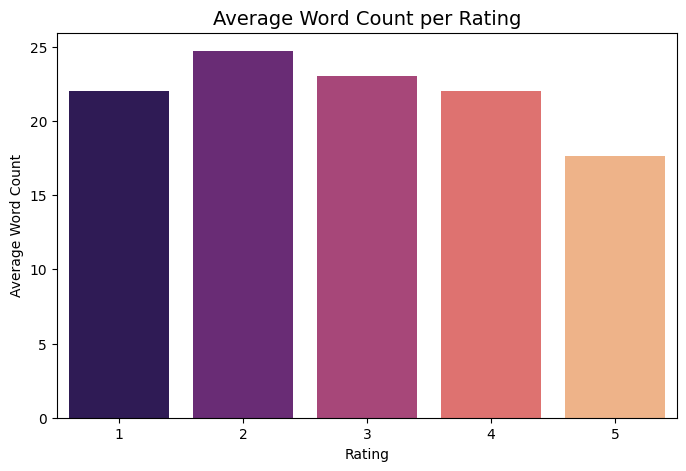

In [73]:
avg_words = filtered_df1.groupby('Rating')['word_count'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Rating', y='word_count', data=avg_words, palette='magma')
plt.title('Average Word Count per Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.show()

# DATA SPLITING 

In [74]:
X = filtered_df1['imbalanced_cleaned_text']
y = filtered_df1['Rating']

# TRAIN TEST Split BY  (80-20)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF–IDF VECTORIZATION

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf1 = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on training data and transform both
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1 = tfidf1.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf1.shape)
print("TF-IDF test shape:", X_test_tfidf1.shape)

TF-IDF train shape: (35336, 5000)
TF-IDF test shape: (8834, 5000)


# MODEL TRAINING

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [78]:
# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

              # Train (fit) the model
log_reg.fit(X_train_tfidf, y_train1)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [79]:
y_pred= log_reg.predict(X_test_tfidf)

#EVALUATION

In [80]:
acc = accuracy_score(y_test1, y_pred)
acc

0.48651685393258426

In [81]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.64      0.59      1831
           2       0.39      0.38      0.39      1820
           3       0.39      0.34      0.36      1792
           4       0.45      0.42      0.44      1755
           5       0.62      0.65      0.63      1702

    accuracy                           0.49      8900
   macro avg       0.48      0.49      0.48      8900
weighted avg       0.48      0.49      0.48      8900



Text(0.5, 25.722222222222214, 'Predicted Label')

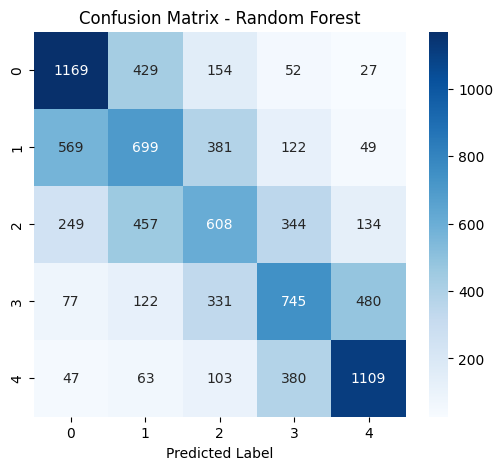

In [82]:
cm = confusion_matrix(y_test1, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")



   Naive Bayes


In [83]:
from sklearn.naive_bayes import MultinomialNB

# Initialize model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_tfidf, y_train1)

# Predict labels on the test data
y_pred_nb = nb.predict(X_test_tfidf)


#EVALUATION 

In [84]:
acc = accuracy_score(y_test1, y_pred_nb)
acc

0.4848314606741573

In [85]:
print(classification_report(y_test1, y_pred_nb))

              precision    recall  f1-score   support

           1       0.55      0.66      0.60      1831
           2       0.39      0.36      0.37      1820
           3       0.38      0.33      0.36      1792
           4       0.45      0.43      0.44      1755
           5       0.61      0.65      0.63      1702

    accuracy                           0.48      8900
   macro avg       0.48      0.49      0.48      8900
weighted avg       0.48      0.48      0.48      8900



Text(0.5, 25.722222222222214, 'Predicted Label')

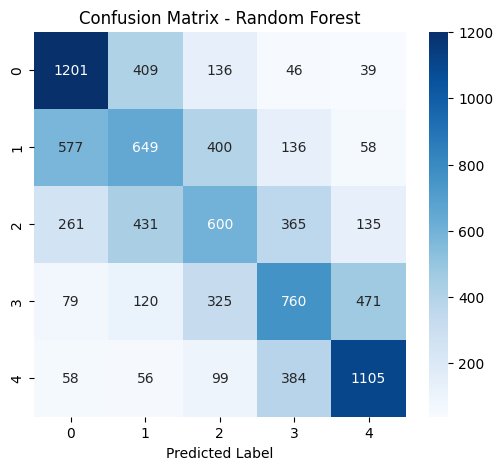

In [86]:
cm = confusion_matrix(y_test1, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


RANDOM FOREST

In [87]:

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_tfidf, y_train1)

# Predict labels on the test data
y_pred_rf = rf.predict(X_test_tfidf)


In [88]:
acc = accuracy_score(y_test1, y_pred_rf)
acc

0.451685393258427

In [89]:
print(classification_report(y_test1, y_pred_rf))

              precision    recall  f1-score   support

           1       0.49      0.68      0.57      1831
           2       0.36      0.30      0.33      1820
           3       0.37      0.24      0.29      1792
           4       0.42      0.40      0.41      1755
           5       0.56      0.64      0.60      1702

    accuracy                           0.45      8900
   macro avg       0.44      0.45      0.44      8900
weighted avg       0.44      0.45      0.44      8900



Text(0.5, 25.722222222222214, 'Predicted Label')

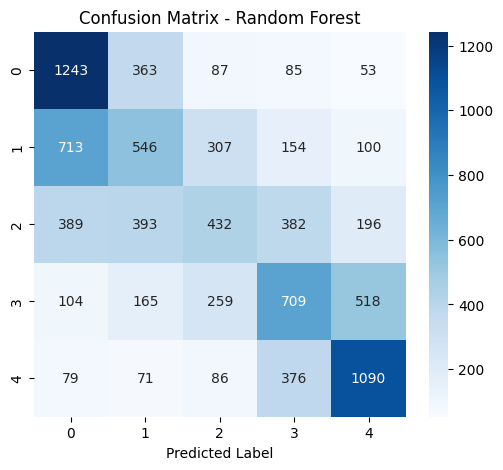

In [90]:
cm = confusion_matrix(y_test1, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


# DATA MODELLING IN IMBALANCED DATA SET

logistic regression

In [91]:
# Initialize model
log_reg1 = LogisticRegression(max_iter=1000, random_state=42)

              # Train (fit) the model
log_reg1.fit(X_train_tfidf1, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [92]:
y_pred1= log_reg1.predict(X_test_tfidf1)

# EVALUATION of MODEL 

## 1.ACCURACY

In [93]:
acc = accuracy_score(y_test, y_pred1)
acc

0.5732397554901517

## 2.CLASSIFICATION REPORT

In [94]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.60      0.63      0.61      1375
           2       0.45      0.16      0.24       909
           3       0.51      0.65      0.57      2246
           4       0.48      0.35      0.40      1750
           5       0.67      0.77      0.72      2554

    accuracy                           0.57      8834
   macro avg       0.54      0.51      0.51      8834
weighted avg       0.56      0.57      0.55      8834



Overall Accuracy: 57% → The model correctly predicts the class for about 57% of samples.

Best-performing class: Class 5 (Precision 0.67, Recall 0.77, F1 0.72) → Model predicts this class most reliably.

Worst-performing class: Class 2 (Precision 0.45, Recall 0.16, F1 0.24) → Model struggles to identify this class.

# CONFUSSION METRIX

Text(0.5, 25.722222222222214, 'Predicted Label')

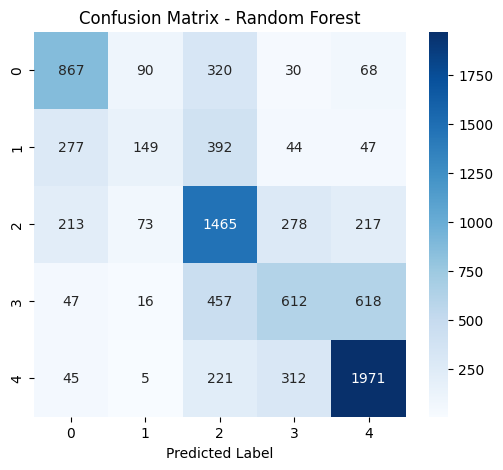

In [95]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


# 2. NAIVE BAYES

In [96]:
# Initialize model
nb1 = MultinomialNB(alpha=0.3)

# Train the model
nb1.fit(X_train_tfidf1, y_train)

# Predict labels on the test data
y_pred_nb = nb.predict(X_test_tfidf1)

In [97]:
acc = accuracy_score(y_test, y_pred_nb)
acc

0.2415666742132669

In [98]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.20      0.30      0.24      1375
           2       0.12      0.25      0.16       909
           3       0.29      0.25      0.27      2246
           4       0.22      0.19      0.20      1750
           5       0.42      0.23      0.30      2554

    accuracy                           0.24      8834
   macro avg       0.25      0.24      0.23      8834
weighted avg       0.28      0.24      0.25      8834



Overall Accuracy: 55% → Slightly lower than before, so the model is only correct for about half of the samples.

Best-performing class: Class 5 (Precision 0.63, Recall 0.80, F1 0.70) → Model predicts this class most reliably.

Worst-performing class: Class 2 (Precision 0.57, Recall 0.03, F1 0.05) → Model almost completely fails to identify this class.

Macro average: 0.45–0.47 → When treating all classes equally, the performance is quite low.

Weighted average: F1 0.51 → Considering class sizes, overall performance is slightly above 5

Text(0.5, 25.722222222222214, 'Predicted Label')

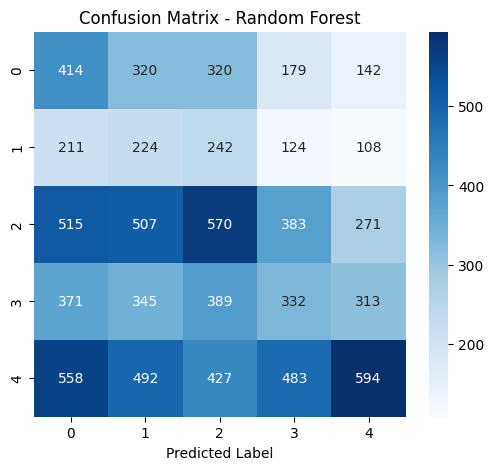

In [99]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


# 3 . RANDOM FOREST

In [100]:

# Initialize model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf2.fit(X_train_tfidf1, y_train)

# Predict labels on the test data
y_pred_rf = rf2.predict(X_test_tfidf1)

# accuracy 

In [101]:
acc = accuracy_score(y_test, y_pred_rf)
acc

0.6767036450079239

# classification report

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.67      0.71      0.69      1375
           2       0.91      0.36      0.52       909
           3       0.63      0.79      0.70      2246
           4       0.70      0.43      0.54      1750
           5       0.69      0.84      0.76      2554

    accuracy                           0.68      8834
   macro avg       0.72      0.63      0.64      8834
weighted avg       0.70      0.68      0.66      8834



Overall Accuracy: 68% → Significant improvement; the model correctly predicts over two-thirds of samples.

Best-performing class: Class 5 (Precision 0.69, Recall 0.84, F1 0.76) → Most reliably predicted class.

Most improved class: Class 2 (Precision 0.91, Recall 0.36, F1 0.52) → High precision but recall still low, meaning predictions are mostly correct when made, but many class 2 instances are missed.

Macro average: 0.64 → On average across all classes, performance is moderately strong.

Weighted average: 0.66 → Considering class sizes, overall performance is solid

# confussion matrix

Text(0.5, 25.722222222222214, 'Predicted Label')

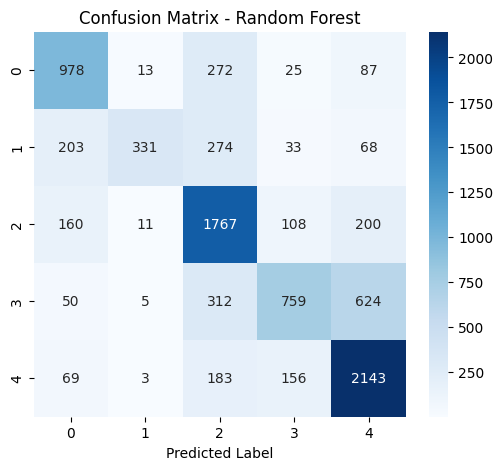

In [103]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


# CROSS VALIDATION

In [104]:
import joblib

# Create a dictionary of all models
all_models = {
    'logistic_regression': log_reg,
    'naive_bayes': nb,
    'random_forest': rf
}

# Save all models in a single file called model1.pkl
joblib.dump(all_models, 'model1.pkl')

['model1.pkl']

In [105]:
# Create a dictionary of all models
all_models = {
    'logistic_regression': log_reg1,
    'naive_bayes': nb1,
    'random_forest': rf2
}

# Save all models in a single file called model1.pkl
joblib.dump(all_models, 'model2.pkl')

['model2.pkl']

In [106]:
import joblib

# Load your saved model
model1 = joblib.load("model1.pkl")

print("✅ Model1 loaded successfully!")
print(model1)

✅ Model1 loaded successfully!
{'logistic_regression': LogisticRegression(max_iter=1000, random_state=42), 'naive_bayes': MultinomialNB(), 'random_forest': RandomForestClassifier(random_state=42)}


In [107]:

# Load your saved model
model2 = joblib.load("model2.pkl")

print("✅ Model2 loaded successfully!")
print(model2)

✅ Model2 loaded successfully!
{'logistic_regression': LogisticRegression(max_iter=1000, random_state=42), 'naive_bayes': MultinomialNB(alpha=0.3), 'random_forest': RandomForestClassifier(random_state=42)}


# Make predictions on the test set

In [108]:
y_pred1 = model1['logistic_regression'].predict(X_test_tfidf1)


# 3. Evaluate the model performance, focusing on metrics for imbalanced data



In [109]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Model 1 Test Accuracy: {accuracy1:.4f}")

Model 1 Test Accuracy: 0.2022


In [110]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.17      0.33      0.22      1375
           2       0.10      0.25      0.15       909
           3       0.28      0.29      0.28      2246
           4       0.24      0.11      0.15      1750
           5       0.33      0.10      0.16      2554

    accuracy                           0.20      8834
   macro avg       0.22      0.22      0.19      8834
weighted avg       0.25      0.20      0.20      8834



Text(0.5, 25.722222222222214, 'Predicted Label')

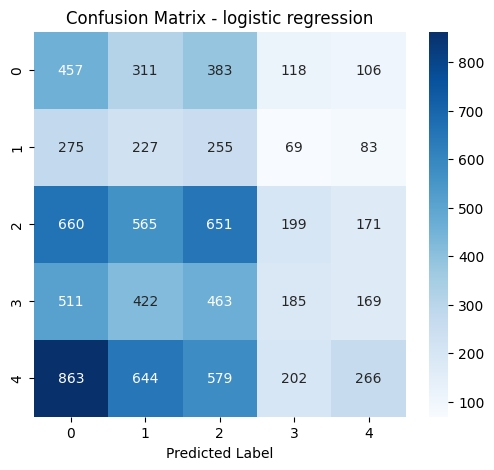

In [111]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - logistic regression")
plt.xlabel("Predicted Label")

# naive bayes

In [112]:
y_pred2 = model1['naive_bayes'].predict(X_test_tfidf1)

In [113]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Model 1 Test Accuracy: {accuracy2:.4f}")

Model 1 Test Accuracy: 0.2416


In [114]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.20      0.30      0.24      1375
           2       0.12      0.25      0.16       909
           3       0.29      0.25      0.27      2246
           4       0.22      0.19      0.20      1750
           5       0.42      0.23      0.30      2554

    accuracy                           0.24      8834
   macro avg       0.25      0.24      0.23      8834
weighted avg       0.28      0.24      0.25      8834



Text(0.5, 25.722222222222214, 'Predicted Label')

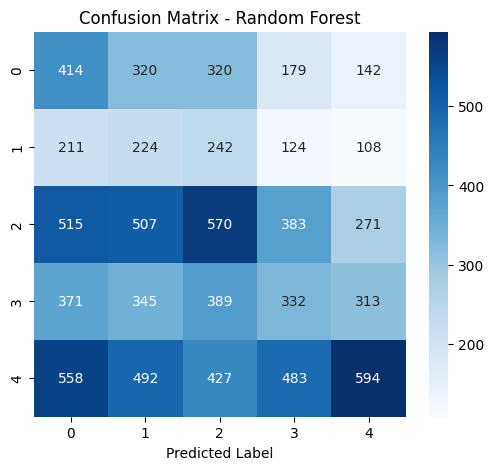

In [115]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")

# random forest

In [116]:
y_pred3 = model1['random_forest'].predict(X_test_tfidf1)

In [117]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Model 1 Test Accuracy: {accuracy3:.4f}")

Model 1 Test Accuracy: 0.2219


In [118]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.20      0.24      0.22      1375
           2       0.10      0.22      0.14       909
           3       0.26      0.42      0.32      2246
           4       0.23      0.05      0.08      1750
           5       0.33      0.16      0.21      2554

    accuracy                           0.22      8834
   macro avg       0.22      0.22      0.19      8834
weighted avg       0.25      0.22      0.21      8834



Text(0.5, 25.722222222222214, 'Predicted Label')

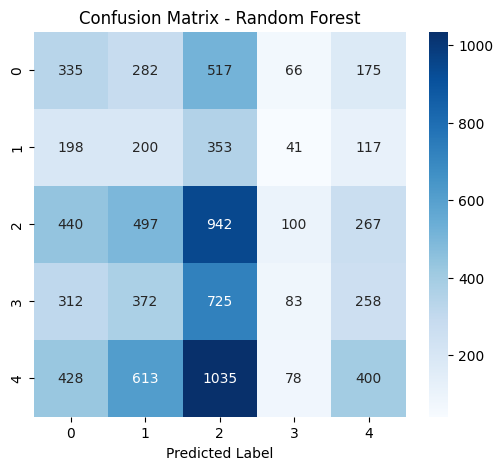

In [119]:
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")

imbalmaced data's cross test with balanced (model 2 with modl 1)

# logistic regression

In [120]:
y_pred4 = model2['logistic_regression'].predict(X_test_tfidf)

In [121]:
accuracy4 = accuracy_score(y_test1, y_pred4)
print(f"Model 2 Test Accuracy: {accuracy4:.4f}")

Model 2 Test Accuracy: 0.2103


In [122]:
print(classification_report(y_test1, y_pred4))

              precision    recall  f1-score   support

           1       0.26      0.16      0.20      1831
           2       0.23      0.05      0.08      1820
           3       0.20      0.55      0.29      1792
           4       0.20      0.10      0.14      1755
           5       0.20      0.20      0.20      1702

    accuracy                           0.21      8900
   macro avg       0.22      0.21      0.18      8900
weighted avg       0.22      0.21      0.18      8900



Text(0.5, 25.722222222222214, 'Predicted Label')

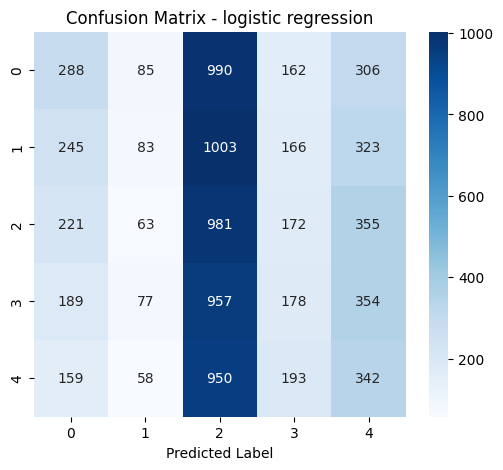

In [123]:
cm = confusion_matrix(y_test1, y_pred4)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - logistic regression")
plt.xlabel("Predicted Label")

In [124]:
y_pred5 = model2['naive_bayes'].predict(X_test_tfidf)

In [125]:
accuracy5 = accuracy_score(y_test1, y_pred5)
print(f"Model 2 Test Accuracy: {accuracy5:.4f}")

Model 2 Test Accuracy: 0.2285


In [126]:
print(classification_report(y_test1, y_pred5))

              precision    recall  f1-score   support

           1       0.28      0.12      0.17      1831
           2       0.22      0.06      0.09      1820
           3       0.21      0.56      0.31      1792
           4       0.20      0.15      0.17      1755
           5       0.28      0.26      0.27      1702

    accuracy                           0.23      8900
   macro avg       0.24      0.23      0.20      8900
weighted avg       0.24      0.23      0.20      8900



# random forest

In [127]:
y_pred6 = model2['random_forest'].predict(X_test_tfidf)

In [128]:
accuracy6 = accuracy_score(y_test1, y_pred6)
print(f"Model 2 Test Accuracy: {accuracy6:.4f}")

Model 2 Test Accuracy: 0.2063


In [129]:
print(classification_report(y_test1, y_pred6))

              precision    recall  f1-score   support

           1       0.25      0.16      0.19      1831
           2       0.07      0.00      0.01      1820
           3       0.20      0.67      0.31      1792
           4       0.23      0.05      0.08      1755
           5       0.19      0.15      0.17      1702

    accuracy                           0.21      8900
   macro avg       0.19      0.21      0.15      8900
weighted avg       0.19      0.21      0.15      8900



Text(0.5, 25.722222222222214, 'Predicted Label')

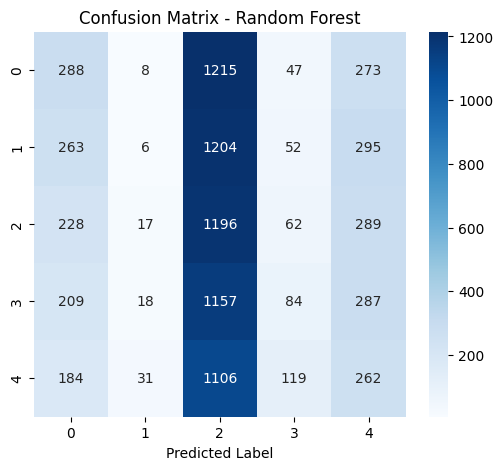

In [130]:
cm = confusion_matrix(y_test1, y_pred6)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")


In [131]:
print(f"logistic regression (model 1) :{accuracy1}")
print(f"naive bayes (model 1) :{accuracy2}")
print(f" random forest (model 1) :{accuracy3}")
print(f"logistic regression (model 2) :{accuracy4}")
print(f" naive bayes regression (model 2) :{accuracy5}")
print(f"random forest (model 2) :{accuracy6}")

logistic regression (model 1) :0.2021734208738963
naive bayes (model 1) :0.2415666742132669
 random forest (model 1) :0.2218700475435816
logistic regression (model 2) :0.21033707865168538
 naive bayes regression (model 2) :0.22853932584269662
random forest (model 2) :0.20629213483146067


In [132]:
# Train again on balanced model

In [133]:

tfidf7 = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf7 = tfidf7.fit_transform(X_train1)
X_test_tfidf7 = tfidf7.transform(X_test1)

In [134]:

log_reg7 = LogisticRegression(
    max_iter=5000,
    C=2,
    solver='liblinear',
    class_weight='balanced',  # helps if classes are imbalanced
    random_state=42
)
log_reg7.fit(X_train_tfidf7, y_train1)


c:\mldl_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,2
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,5000
,multi_class,'deprecated'


In [135]:
nb7 = MultinomialNB(alpha=0.3)  # try smaller alpha for sparse data
nb7.fit(X_train_tfidf7, y_train1)

,alpha,0.3
,force_alpha,True
,fit_prior,True
,class_prior,None


In [136]:
rf7 = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf7.fit(X_train_tfidf7, y_train1)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
y_pred_lr = log_reg7.predict(X_test_tfidf7)
print("Logistic Regression Accuracy:", accuracy_score(y_test1, y_pred_lr))
print(classification_report(y_test1, y_pred_lr))

y_pred_nb = nb7.predict(X_test_tfidf7)
print("Naive Bayes Accuracy:", accuracy_score(y_test1, y_pred_nb))
print(classification_report(y_test1, y_pred_nb))

y_pred_rf = rf7.predict(X_test_tfidf7)
print("Random Forest Accuracy:", accuracy_score(y_test1, y_pred_rf))
print(classification_report(y_test1, y_pred_rf))


Logistic Regression Accuracy: 0.48089887640449436
              precision    recall  f1-score   support

           1       0.55      0.65      0.60      1831
           2       0.39      0.35      0.37      1820
           3       0.38      0.33      0.35      1792
           4       0.44      0.40      0.42      1755
           5       0.59      0.68      0.63      1702

    accuracy                           0.48      8900
   macro avg       0.47      0.48      0.47      8900
weighted avg       0.47      0.48      0.47      8900

Naive Bayes Accuracy: 0.480561797752809
              precision    recall  f1-score   support

           1       0.55      0.64      0.59      1831
           2       0.39      0.36      0.37      1820
           3       0.38      0.34      0.36      1792
           4       0.44      0.42      0.43      1755
           5       0.61      0.65      0.63      1702

    accuracy                           0.48      8900
   macro avg       0.47      0.48      0.

In [138]:
import pickle

# Load the existing Model 1 if needed
# with open('Model_1.pkl', 'rb') as file:
#     model1 = pickle.load(file)

# Replace old models with new ones
model1 = {
    'logistic_regression': log_reg7,
    'naive_bayes': nb7,
    'random_forest': rf7
}

# Save the updated Model 1
with open('Model_1.pkl', 'wb') as file:
    pickle.dump(model1, file)

print("Model_1 updated with log_reg7, nb7, and rf7.")


Model_1 updated with log_reg7, nb7, and rf7.


# imbalnced cross text with balanced

In [149]:

tfidf8 = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf8 = tfidf8.fit_transform(X_train)
X_test_tfidf8= tfidf8.transform(X_test)

In [150]:
log_reg8 = LogisticRegression(
    max_iter=5000,
    C=2,
    solver='liblinear',
    class_weight='balanced',  # helps if classes are imbalanced
    random_state=42
)
log_reg8.fit(X_train_tfidf8, y_train)

c:\mldl_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,2
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,5000
,multi_class,'deprecated'


In [151]:
nb8 = MultinomialNB(alpha=0.3)  # try smaller alpha for sparse data
nb8.fit(X_train_tfidf8, y_train)

,alpha,0.3
,force_alpha,True
,fit_prior,True
,class_prior,None


In [152]:
rf8 = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf8.fit(X_train_tfidf8, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
y_pred_lr = log_reg8.predict(X_test_tfidf8)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

y_pred_nb = nb8.predict(X_test_tfidf8)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

y_pred_rf = rf8.predict(X_test_tfidf8)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.5681458003169572
              precision    recall  f1-score   support

           1       0.57      0.66      0.61      1375
           2       0.37      0.36      0.36       909
           3       0.56      0.53      0.54      2246
           4       0.47      0.40      0.43      1750
           5       0.70      0.74      0.72      2554

    accuracy                           0.57      8834
   macro avg       0.53      0.54      0.53      8834
weighted avg       0.56      0.57      0.56      8834

Naive Bayes Accuracy: 0.5564863029205342
              precision    recall  f1-score   support

           1       0.60      0.60      0.60      1375
           2       0.50      0.08      0.14       909
           3       0.48      0.68      0.56      2246
           4       0.50      0.29      0.36      1750
           5       0.64      0.78      0.70      2554

    accuracy                           0.56      8834
   macro avg       0.54      0.49      0.

In [160]:
# Load the existing Model 1 if needed
# with open('Model_1.pkl', 'rb') as file:
#     model1 = pickle.load(file)

# Replace old models with new ones
model2 = {
    'logistic_regression': log_reg8,
    'naive_bayes': nb8,
    'random_forest': rf8
}

# Save the updated Model 1
with open('Model_2.pkl', 'wb') as file:
    pickle.dump(model2, file)

print("Model_2 updated with log_reg8, nb8, and rf8.")


Model_2 updated with log_reg8, nb8, and rf8.
